# MNIST (Modified National Institute of Standards and Technology database)

To get the files from the following website, these files will be used to train. 

[http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)

## Reading bytes from files

First we get the images from our zipped file in the data folder.

The imports we will need:

In [1]:
import sklearn.preprocessing as pre
import gzip
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import keras as kr
import sklearn.preprocessing as pre

Using TensorFlow backend.


Read in a zipped file and unzip an image. Read in the image as a byte array.

In [2]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

Reshape the byte array into a 2D array with 28x28 indecies.

In [3]:
image = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)

Now we can show that image as a plot of the data

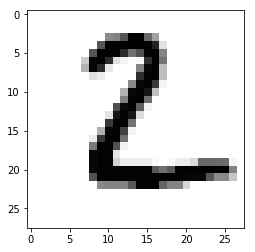

In [4]:
plt.imshow(image, cmap='gray')

## Neural network

To build a neural network we need some data to train the network and data to test against it.

In [5]:
# Read in images
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

# read in labels
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
# Read in images for testing
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

# Read in labels for testing
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()

We will mow use keras to create the network.
We create a sequential network, add different layers, and compile it using the ADAM algorithm.

In [6]:
# Start a neural network, building it by layers.
# using sequential model
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=1000, activation='relu', input_dim=784))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

We can reshape the arrays produce by the traning images and labels, so that they create 28x28 2D arrays.

In [7]:
# reshape the images and labels into 28x28 arrays.    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

Reshape using tensor of 600000, with arrays of 28*28= 784

In [8]:
# reshape the image array 
inputs = train_img.reshape(60000, 784)

We create an encpde and lit it with the train_lbls, we can identify the type and class of the results for later.

In [9]:
# Binarize labels in a one-vs-all fashion
encoder = pre.LabelBinarizer()

# Trains the encoder
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

We now take our inputs with expected outputs to train the network.

In [10]:
# Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(inputs, outputs, epochs=5, batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 10s 159us/step - loss: 14.5481 - acc: 0.0974
Epoch 2/5
60000/60000 [==============================] - 9s 154us/step - loss: 14.5463 - acc: 0.09750s - loss:
Epoch 3/5
60000/60000 [==============================] - 9s 154us/step - loss: 14.5463 - acc: 0.0975
Epoch 4/5
60000/60000 [==============================] - 9s 156us/step - loss: 14.5463 - acc: 0.0975
Epoch 5/5
60000/60000 [==============================] - 9s 154us/step - loss: 14.5463 - acc: 0.0975


We can see from the testing that the neural network is only correct 10% of the time, As we are dealing with digits only between 0-9, this means it is no better off than simply guessing or having a random number generator guess the answer for us.

We can now use our test images and labels to test it.
We start by using the test data that we read in earlier, images and labels that were not in the training data.

In [11]:
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8)
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

## Attempting another method to increase accuracy

After examing the code and understand what each part was doing, Attempting to understand why the accuracy for a nueral network was so low, I changed the way the inputs from the training data was being used. So we run the code the same as before...

Solution found: https://datascience.stackexchange.com/questions/38604/too-low-accuracy-on-mnist-dataset-using-a-neural-network

In [12]:
# Read in images
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

# read in labels
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
# Read in images for testing
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

# Read in labels for testing
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
# Start a neural network, building it by layers.
# using sequential model
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=1000, activation='relu', input_dim=784))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# reshape the images and labels into 28x28 arrays.
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

When we have the trainning images and labels reshaped, we then divide the training images by 255 as the values produced range from 0-255.

In [13]:
train_img = train_img/255

We then change the values for the labels to categorical, this is because the return for the labels is a returned as a vector as such [0,0,1,0,0,0,0,0,0,0] as 3.

In [14]:
train_lbl = kr.utils.to_categorical(train_lbl)

Then we proceed with the code as previous and the result is displayed very differntly.

In [15]:
# reshape the image array
inputs = train_img.reshape(60000, 784)

# Binarize labels in a one-vs-all fashion
encoder = pre.LabelBinarizer()

# Trains the encoder
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

# Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(inputs, outputs, epochs=15, batch_size=100)
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

Epoch 1/15
60000/60000 [==============================] - 16s 268us/step - loss: 0.8836 - acc: 0.8183
Epoch 2/15
60000/60000 [==============================] - 16s 259us/step - loss: 0.3251 - acc: 0.9029
Epoch 3/15
60000/60000 [==============================] - 15s 258us/step - loss: 0.2506 - acc: 0.9251
Epoch 4/15
60000/60000 [==============================] - 15s 255us/step - loss: 0.1977 - acc: 0.9404
Epoch 5/15
60000/60000 [==============================] - 15s 256us/step - loss: 0.1662 - acc: 0.9507
Epoch 6/15
60000/60000 [==============================] - 15s 255us/step - loss: 0.1459 - acc: 0.9559
Epoch 7/15
60000/60000 [==============================] - 16s 261us/step - loss: 0.1332 - acc: 0.9595
Epoch 8/15
60000/60000 [==============================] - 16s 261us/step - loss: 0.1204 - acc: 0.96261s - loss: 0.1183 - acc: 0.96 - ETA: 
Epoch 9/15
60000/60000 [==============================] - 16s 262us/step - loss: 0.1114 - acc: 0.9659
Epoch 10/15
60000/60000 [====================

We can see the image that we are about to have the network predict, we are testing with a 6.

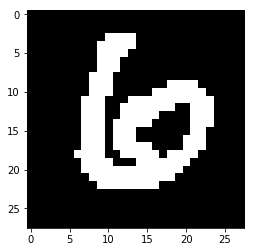

In [22]:
image = ~np.array(list(test_img[11:12])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

We can see by running thepredict classes methods, the response was 6, making the network successful at predicting at least this image.

In [20]:
model.predict_classes(test_img[11:12])

array([6], dtype=int64)